# Import Packages dan Dataset

In [ ]:
# Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Connect Gdrive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Ganti dengan path lengkap ke file CSV Anda di Google Drive
file_path = '/content/marketing_campaign.csv'

# Membaca CSV
df = pd.read_csv(file_path,sep=";")

In [ ]:
# Cek data
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
# Cek data Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

### Intepretasi
 Dt Customer memiliki Dtype Object. Seharusnya diubah menjadi datetime.

In [ ]:
# Mengubah kolom Dt_Customer menjadi dtype datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [ ]:
# Menghapus Fitur Z_CostContact dan Z_Revenue
df.drop(columns=['Z_CostContact','Z_Revenue'],inplace=True)

In [ ]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,2013-07-10 10:01:42.857142784,49.109375,303.935714,26.302232,166.950000,...,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,0.149107
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,23.750000,1.000000,16.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,2013-07-08 12:00:00,49.000000,173.500000,8.000000,67.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,2013-12-30 06:00:00,74.000000,504.250000,33.000000,232.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,NaN,28.962453,336.597393,39.773434,225.715373,...,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.356274


In [ ]:
# Membagi data numerik dan kategorik
df_num = df.select_dtypes(include=['int64', 'float64'])
df_cat = df.select_dtypes(include=['object'])

# Data Cleansing

## A. Handle Missing Value

In [ ]:
# Menghitung Jumlah missing value tiap fitur
df.isna().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


### Intepretasi
terdapat 24 data missing pada kolom Income selajutnya missing data sebaiknya dihapus saja.

In [ ]:
# Hitung jumlah baris dataset
df.shape[0]

2240

In [ ]:
# Drop missing value
df.dropna(inplace=True)

In [ ]:
# Hitung kembali jumlah baris
df.shape[0]

2216

Tersisa 2216 baris data setelah menghapus data missing values.

## B. Handle Data Duplicates

In [ ]:
# Cek apakah ada data duplikat
df.duplicated().any()

False

### Intepretasi

Tidak ada data duplicate dalam data set sehingga proses data cleansing dapat langsung dilanjutkan

## C. Handling Outliers

# Feature Engineering

## Feature Extraction

In [ ]:
# Membuat kolom have child
df['have_child'] = df['Kidhome'] + df['Teenhome']

In [ ]:
# Membuat kolom total jumlah pembelian pelanggan
df['sum_of_amount'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

In [ ]:
# Membuat kolom Apakah pelanggan pernah menerima campaign
df['Acc_Cmp'] = df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['AcceptedCmp1'] + df['AcceptedCmp2']
df['Acc_Cmp'] = np.where(df['Acc_Cmp']>1,1,df['Acc_Cmp'])
df['Acc_Cmp'].unique()

array([0, 1])

In [ ]:
# Membuat Kolom Age
df['Age'] = 2024 - df['Year_Birth']
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,have_child,sum_of_amount,Acc_Cmp,Age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,1,0,1617,0,67
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,2,27,0,70
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,0,776,0,59
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,0,1,53,0,40
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,1,422,0,43


In [ ]:
# List nama kolom numerik
df_num = df.select_dtypes(include=['int64', 'float64'])
nums = list(df_num.columns)

## Feature Selection

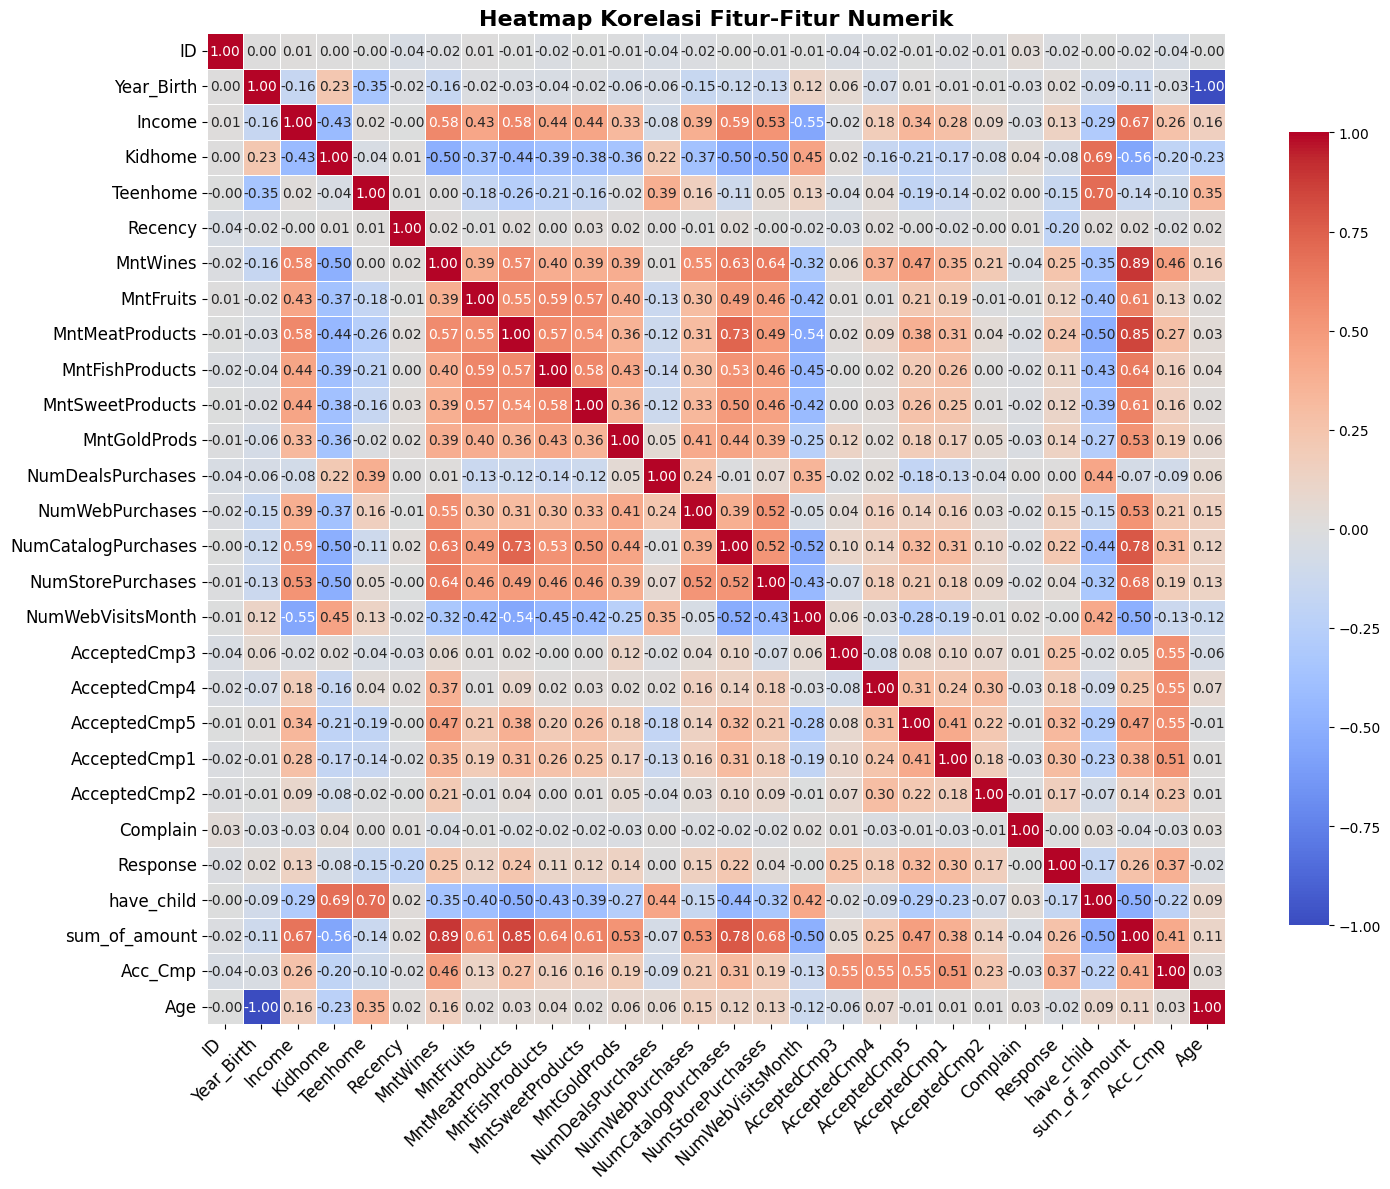

In [ ]:
# Membuat Heatmap Correlation
df_num_corr = df[nums].corr()

# Menentukan ukuran figure yang lebih besar untuk tampilan lebih baik
plt.figure(figsize=(15, 12))  # Ukuran figure yang lebih besar

# Membuat heatmap dengan beberapa parameter tambahan untuk merapikan tampilannya
sns.heatmap(df_num_corr,
            annot=True,             # Menampilkan nilai korelasi pada setiap sel
            cmap='coolwarm',        # Warna dari heatmap
            linewidths=0.5,         # Lebar garis antar sel
            fmt=".2f",              # Format desimal untuk angka korelasi
            annot_kws={"size": 10}, # Ukuran font anotasi
            cbar_kws={'shrink': 0.8}) # Menyusutkan ukuran colorbar

# Rotasi label x dan y agar lebih mudah dibaca
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotasi dan ukuran font untuk label sumbu x
plt.yticks(fontsize=12)  # Ukuran font untuk label sumbu y

# Menambahkan judul untuk heatmap
plt.title('Heatmap Korelasi Fitur-Fitur Numerik', fontsize=16, weight='bold')

# Menampilkan heatmap
plt.tight_layout()  # Menyusun layout agar rapi dan tidak tumpang tindih
plt.show()

In [ ]:
# prompt: Urutkan hubungan korelasi tiap fitur dengan fitur response mulai dari yang terbesar

# Menghitung korelasi fitur dengan 'Response'
correlation_with_response = df_num.corr()['Response'].sort_values(ascending=False)

# Menampilkan hasil korelasi
print(correlation_with_response)


Response               1.000000
Acc_Cmp                0.367796
AcceptedCmp5           0.323374
AcceptedCmp1           0.297345
sum_of_amount          0.264127
AcceptedCmp3           0.254005
MntWines               0.246299
MntMeatProducts        0.237746
NumCatalogPurchases    0.219914
AcceptedCmp4           0.180205
AcceptedCmp2           0.169294
NumWebPurchases        0.151431
MntGoldProds           0.140332
Income                 0.133047
MntFruits              0.122443
MntSweetProducts       0.116170
MntFishProducts        0.108145
NumStorePurchases      0.036241
Year_Birth             0.023692
NumDealsPurchases      0.003451
Complain              -0.002029
NumWebVisitsMonth     -0.002209
ID                    -0.021491
Age                   -0.023692
Kidhome               -0.077909
Teenhome              -0.153901
have_child            -0.167648
Recency               -0.199766
Name: Response, dtype: float64


In [ ]:
# prompt: cek fitur-fitur mana saja yang berkorelasi lebih dari 0.75

# Find features with correlation greater than 0.75
correlation_matrix = df[nums].corr()
correlated_features = set()
for i in range(len(correlation_matrix.columns)):
  for j in range(i):
    if abs(correlation_matrix.iloc[i, j]) > 0.75:
      colname_i = correlation_matrix.columns[i]
      colname_j = correlation_matrix.columns[j]
      correlated_features.add((colname_i, colname_j))

print("Fitur yang berkorelasi lebih dari 0.75:")
for feature_pair in correlated_features:
  print(feature_pair)


Fitur yang berkorelasi lebih dari 0.75:
('sum_of_amount', 'MntMeatProducts')
('sum_of_amount', 'NumCatalogPurchases')
('Age', 'Year_Birth')
('sum_of_amount', 'MntWines')


## Intepretasi
Fitur dihapus:
1. MntWines
2. NumCatalogPurchases
3. Age
4. MntMeatProducts

In [ ]:
# prompt: menghapus kolom MntWines, NumCatalogPurchases, Age, dan MntMeanProducts dari df

df.drop(columns=['MntWines', 'NumCatalogPurchases', 'Age', 'MntMeatProducts'], inplace=True)

In [ ]:
df_nums = df.select_dtypes(include=['int64', 'float64'])
nums = list(df_nums.columns)

## Feature Tambahan (IDE)
1. Harga Produk.
2. Besaran diskon.
3. Tingkat Pengeluaran (Spending_Level).
4. Umur Pelanggan.

### Handle Outlier Metode IQR

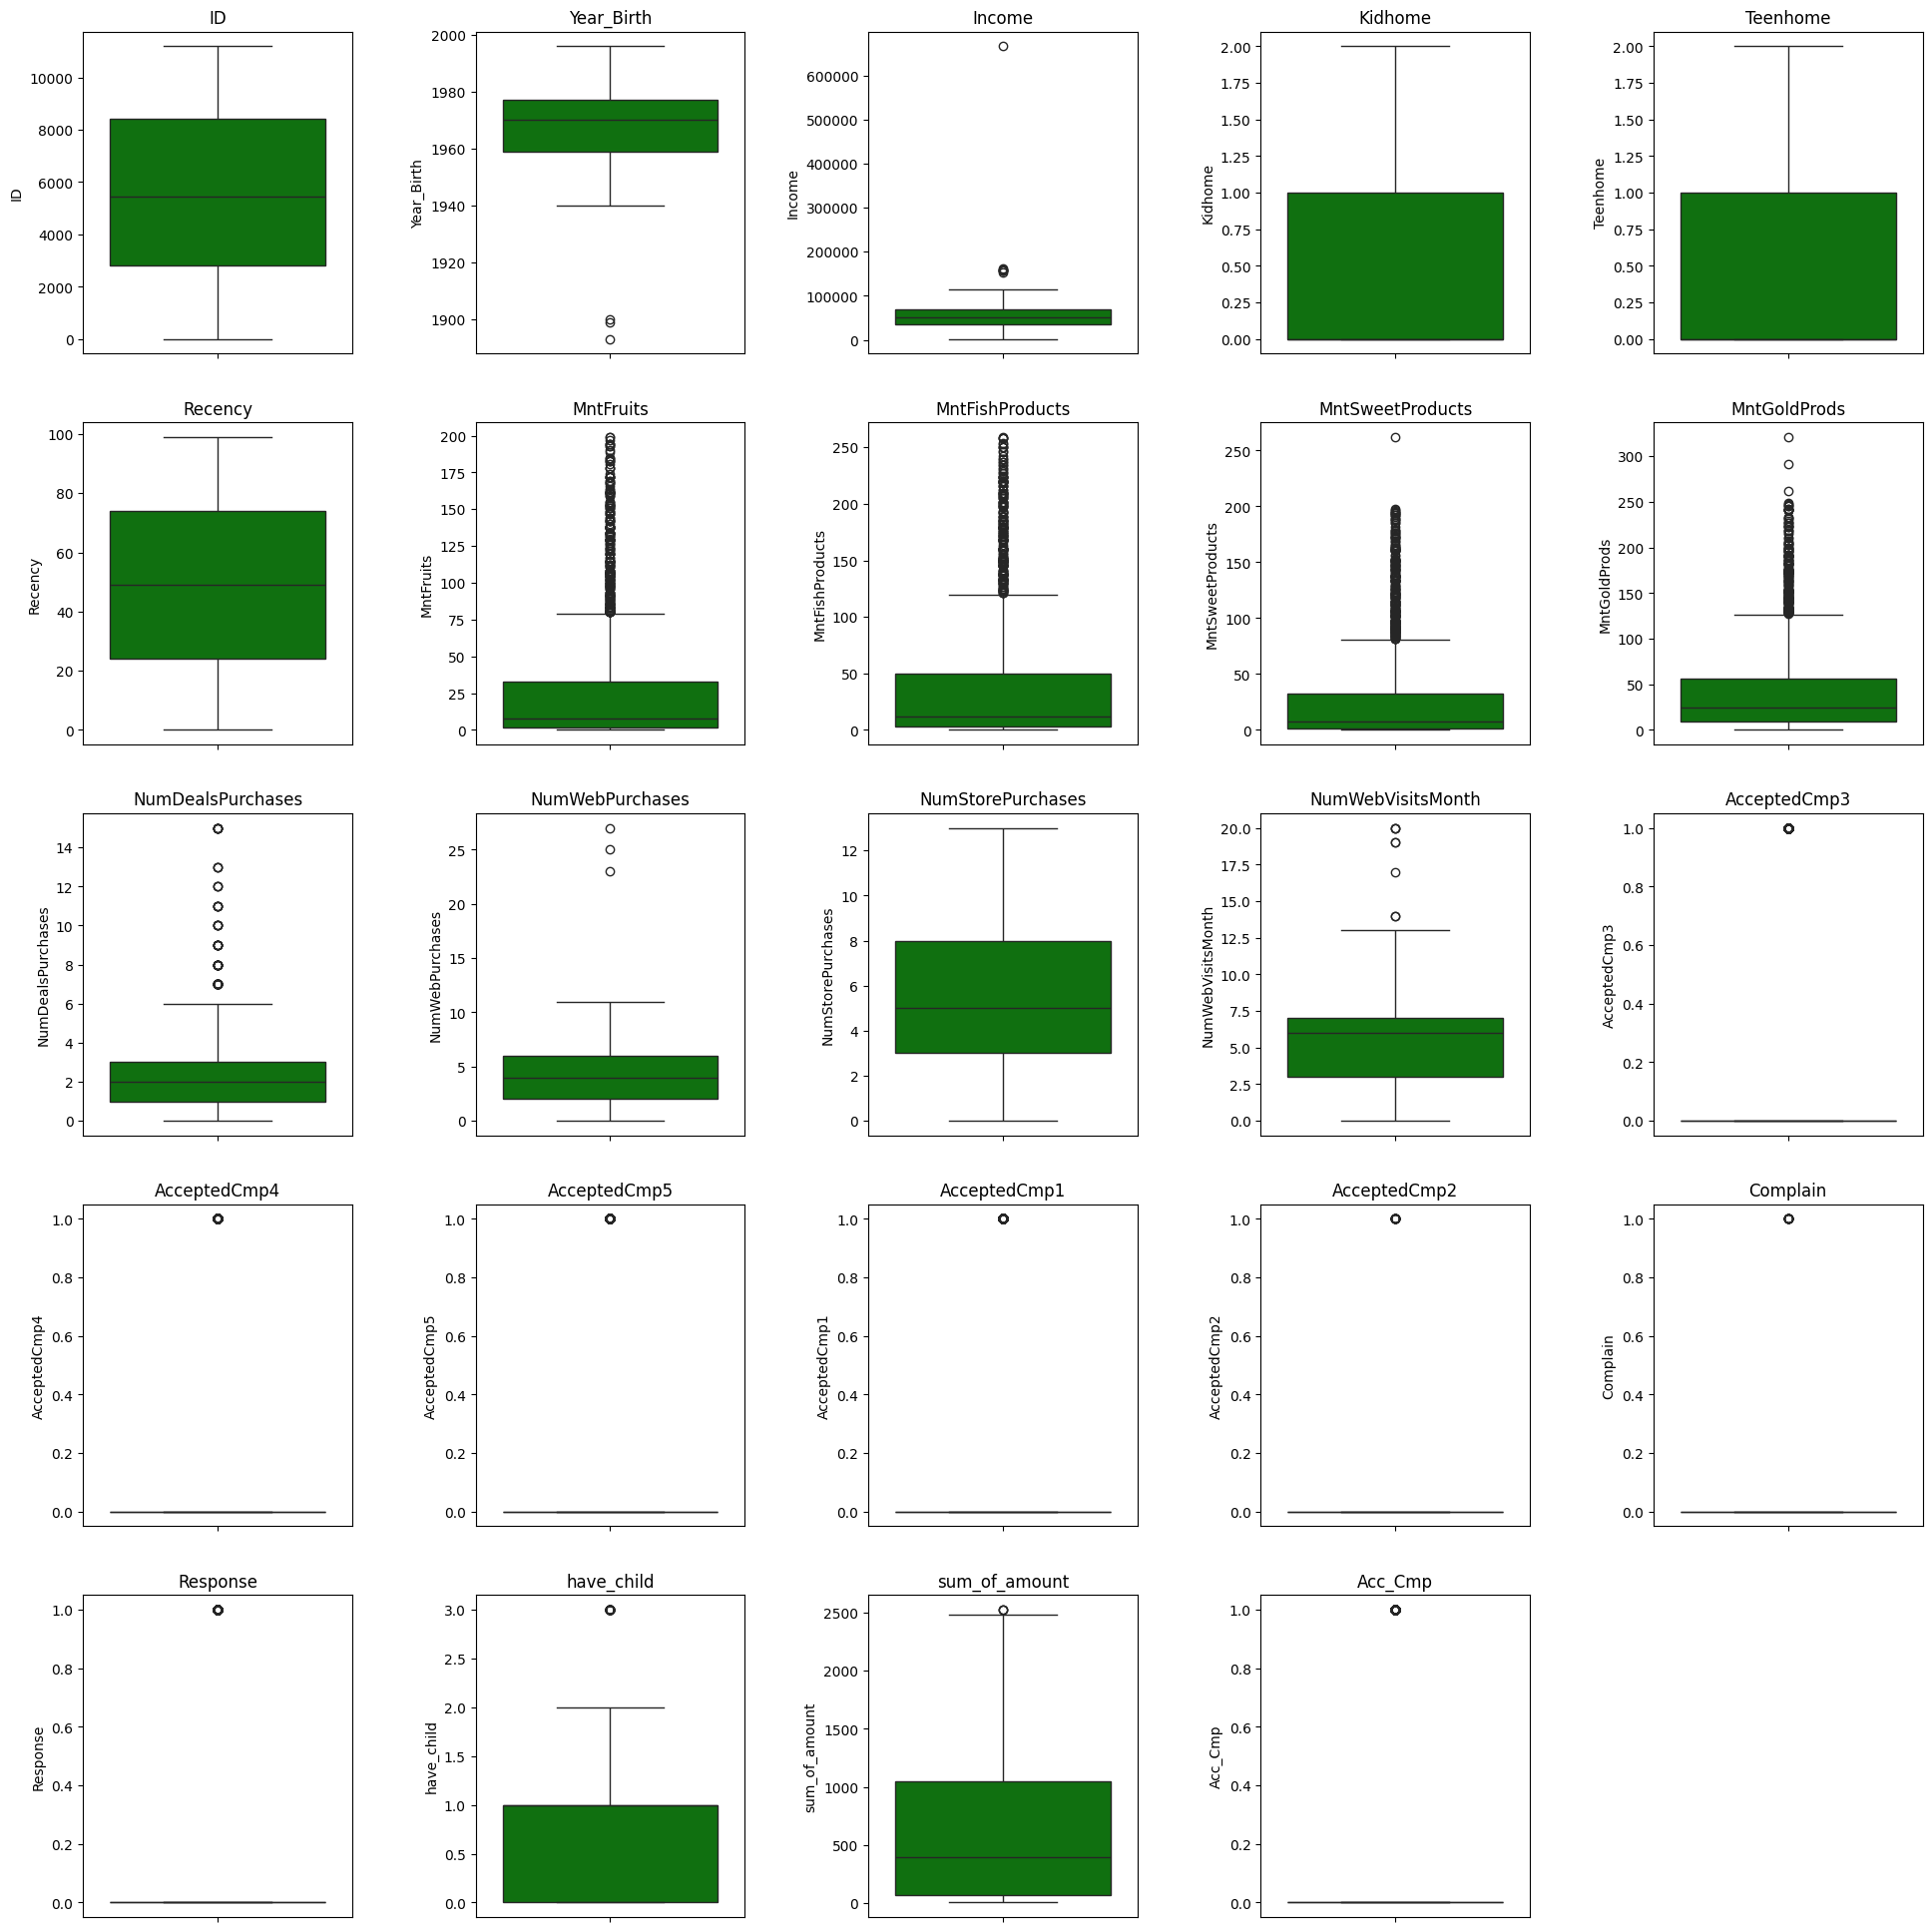

In [ ]:
# Ukuran subplot
n_cols = 5
n_rows = (len(nums) + n_cols - 1) // n_cols  # Pembulatan ke atas untuk memastikan semua kolom ditampilkan

# Membuat figure dengan ukuran yang lebih besar
plt.figure(figsize=(20, 4 * n_rows))

for i, column in enumerate(nums):
    plt.subplot(n_rows, n_cols, i+1)
    sns.boxplot(y=df[column], color='green', orient='v')
    plt.title(column)  # Menambahkan judul untuk masing-masing boxplot
    plt.tight_layout(pad=3.0)  # Mengatur jarak antar subplot

# Menampilkan grafik
plt.show()

Terlihat dari grafik boxplot terdapat banyak Outlier pada berbagai kolom. Selanjutnya Outlier akan ditangani dengan metode IQR dan z-test. Metode z-test akan dilakukan setelah transformasi data.

In [ ]:
df_clean_IQR = df.copy()
# Remove rows containing outliers
initial_data_size = df_clean_IQR.shape[0]

# Iterasi melalui setiap kolom di dalam nums untuk menghapus outliers
for column in nums:
    Q1 = df_clean_IQR[column].quantile(0.25)
    Q3 = df_clean_IQR[column].quantile(0.75)
    IQR = Q3 - Q1

    # Definisikan batas outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Update data dengan menghapus outliers
    df_clean_IQR = df_clean_IQR[(df_clean_IQR[column] >= lower_bound) & (df_clean_IQR[column] <= upper_bound)]

# Ukuran data setelah filter
remaining_data_size = df_clean_IQR.shape[0]
rows_removed = initial_data_size - remaining_data_size

# Menampilkan hasil
print(f'Jumlah data sebelum filter: {initial_data_size}')
print(f'Jumlah data setelah filter: {remaining_data_size}')
print(f'Jumlah baris yang dihapus: {rows_removed}')


Jumlah data sebelum filter: 2216
Jumlah data setelah filter: 891
Jumlah baris yang dihapus: 1325


Jumlah baris data setelah menghapus outlier dengan metode IQR adalah 1325. Jumlah Outlier yang terdeteksi dengan metode ini adalah 891 data.

## D. Feature Trasnformation

### Analisis Distribusi Fitur

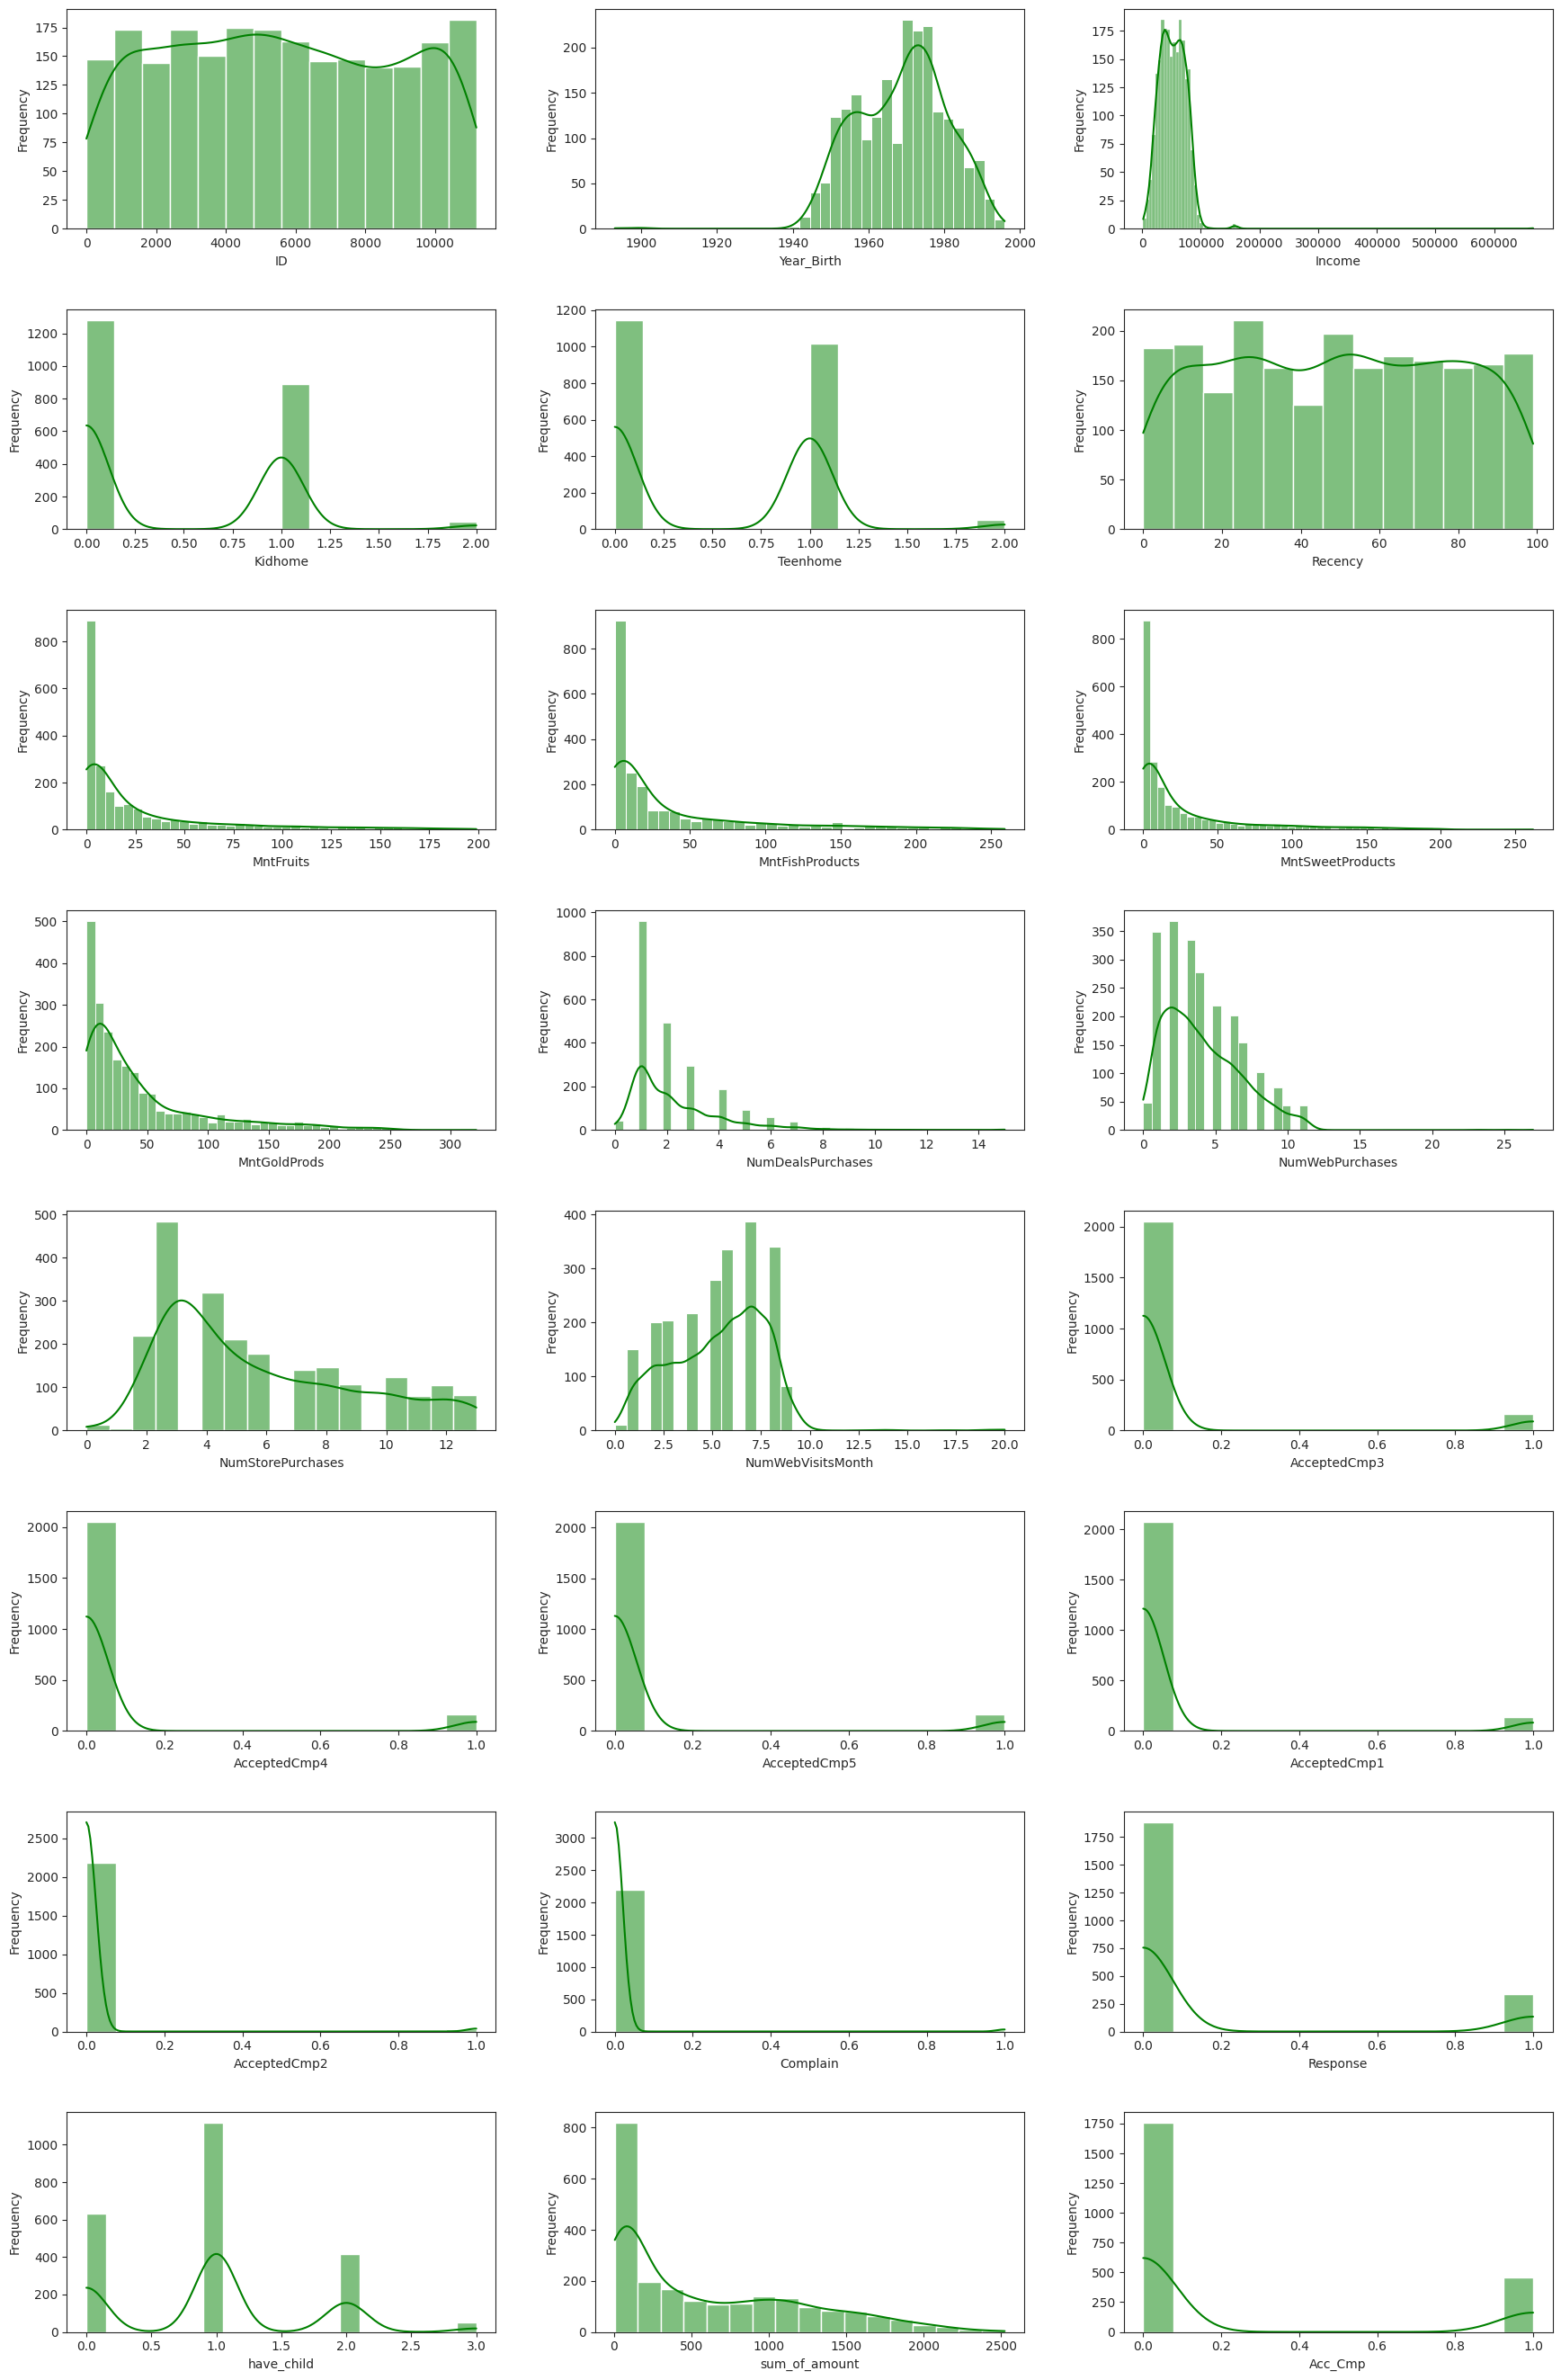

In [ ]:
# Set style
sns.set_style("ticks")

# Menyiapkan figur dengan ukuran yang lebih besar untuk memastikan kejelasan
plt.figure(figsize=(18, 30))  # Adjust the size based on your dataset and the number of subplots

# Create a subplot for each numerical feature
for i, col in enumerate(nums):
    plt.subplot(9, 3, i+1)  # 9x3 layout is suitable for up to 27 subplots
    sns.histplot(x=df[col], color='green', kde=True)  # Adding Kernel Density Estimate (KDE)
    plt.xlabel(col)
    plt.ylabel('Frequency')

# Adjust layout to make sure everything fits without overlapping
plt.tight_layout(pad=3.0)  # You can adjust padding to find what works best for your figures

# Display the plots
plt.show()

Terlihat dari grafik di atas terdapat banyak kolom yang memiliki distribusi positive skewed, sehingga sebaiknya menggunakan metode log transform untuk transformasi data.

In [ ]:
# Fitur dengan distribusi Skewed
skewed = ["Income","Kidhome","Teenhome","Recency","MntFruits","MntFishProducts","MntSweetProducts","MntGoldProds","NumDealsPurchases","NumWebPurchases","NumStorePurchases","NumWebVisitsMonth","sum_of_amount"]

# LogTransform fitur skewed
df_normal = df.copy()
for col in skewed:
    df_normal[col] = np.log1p(df_normal[col])

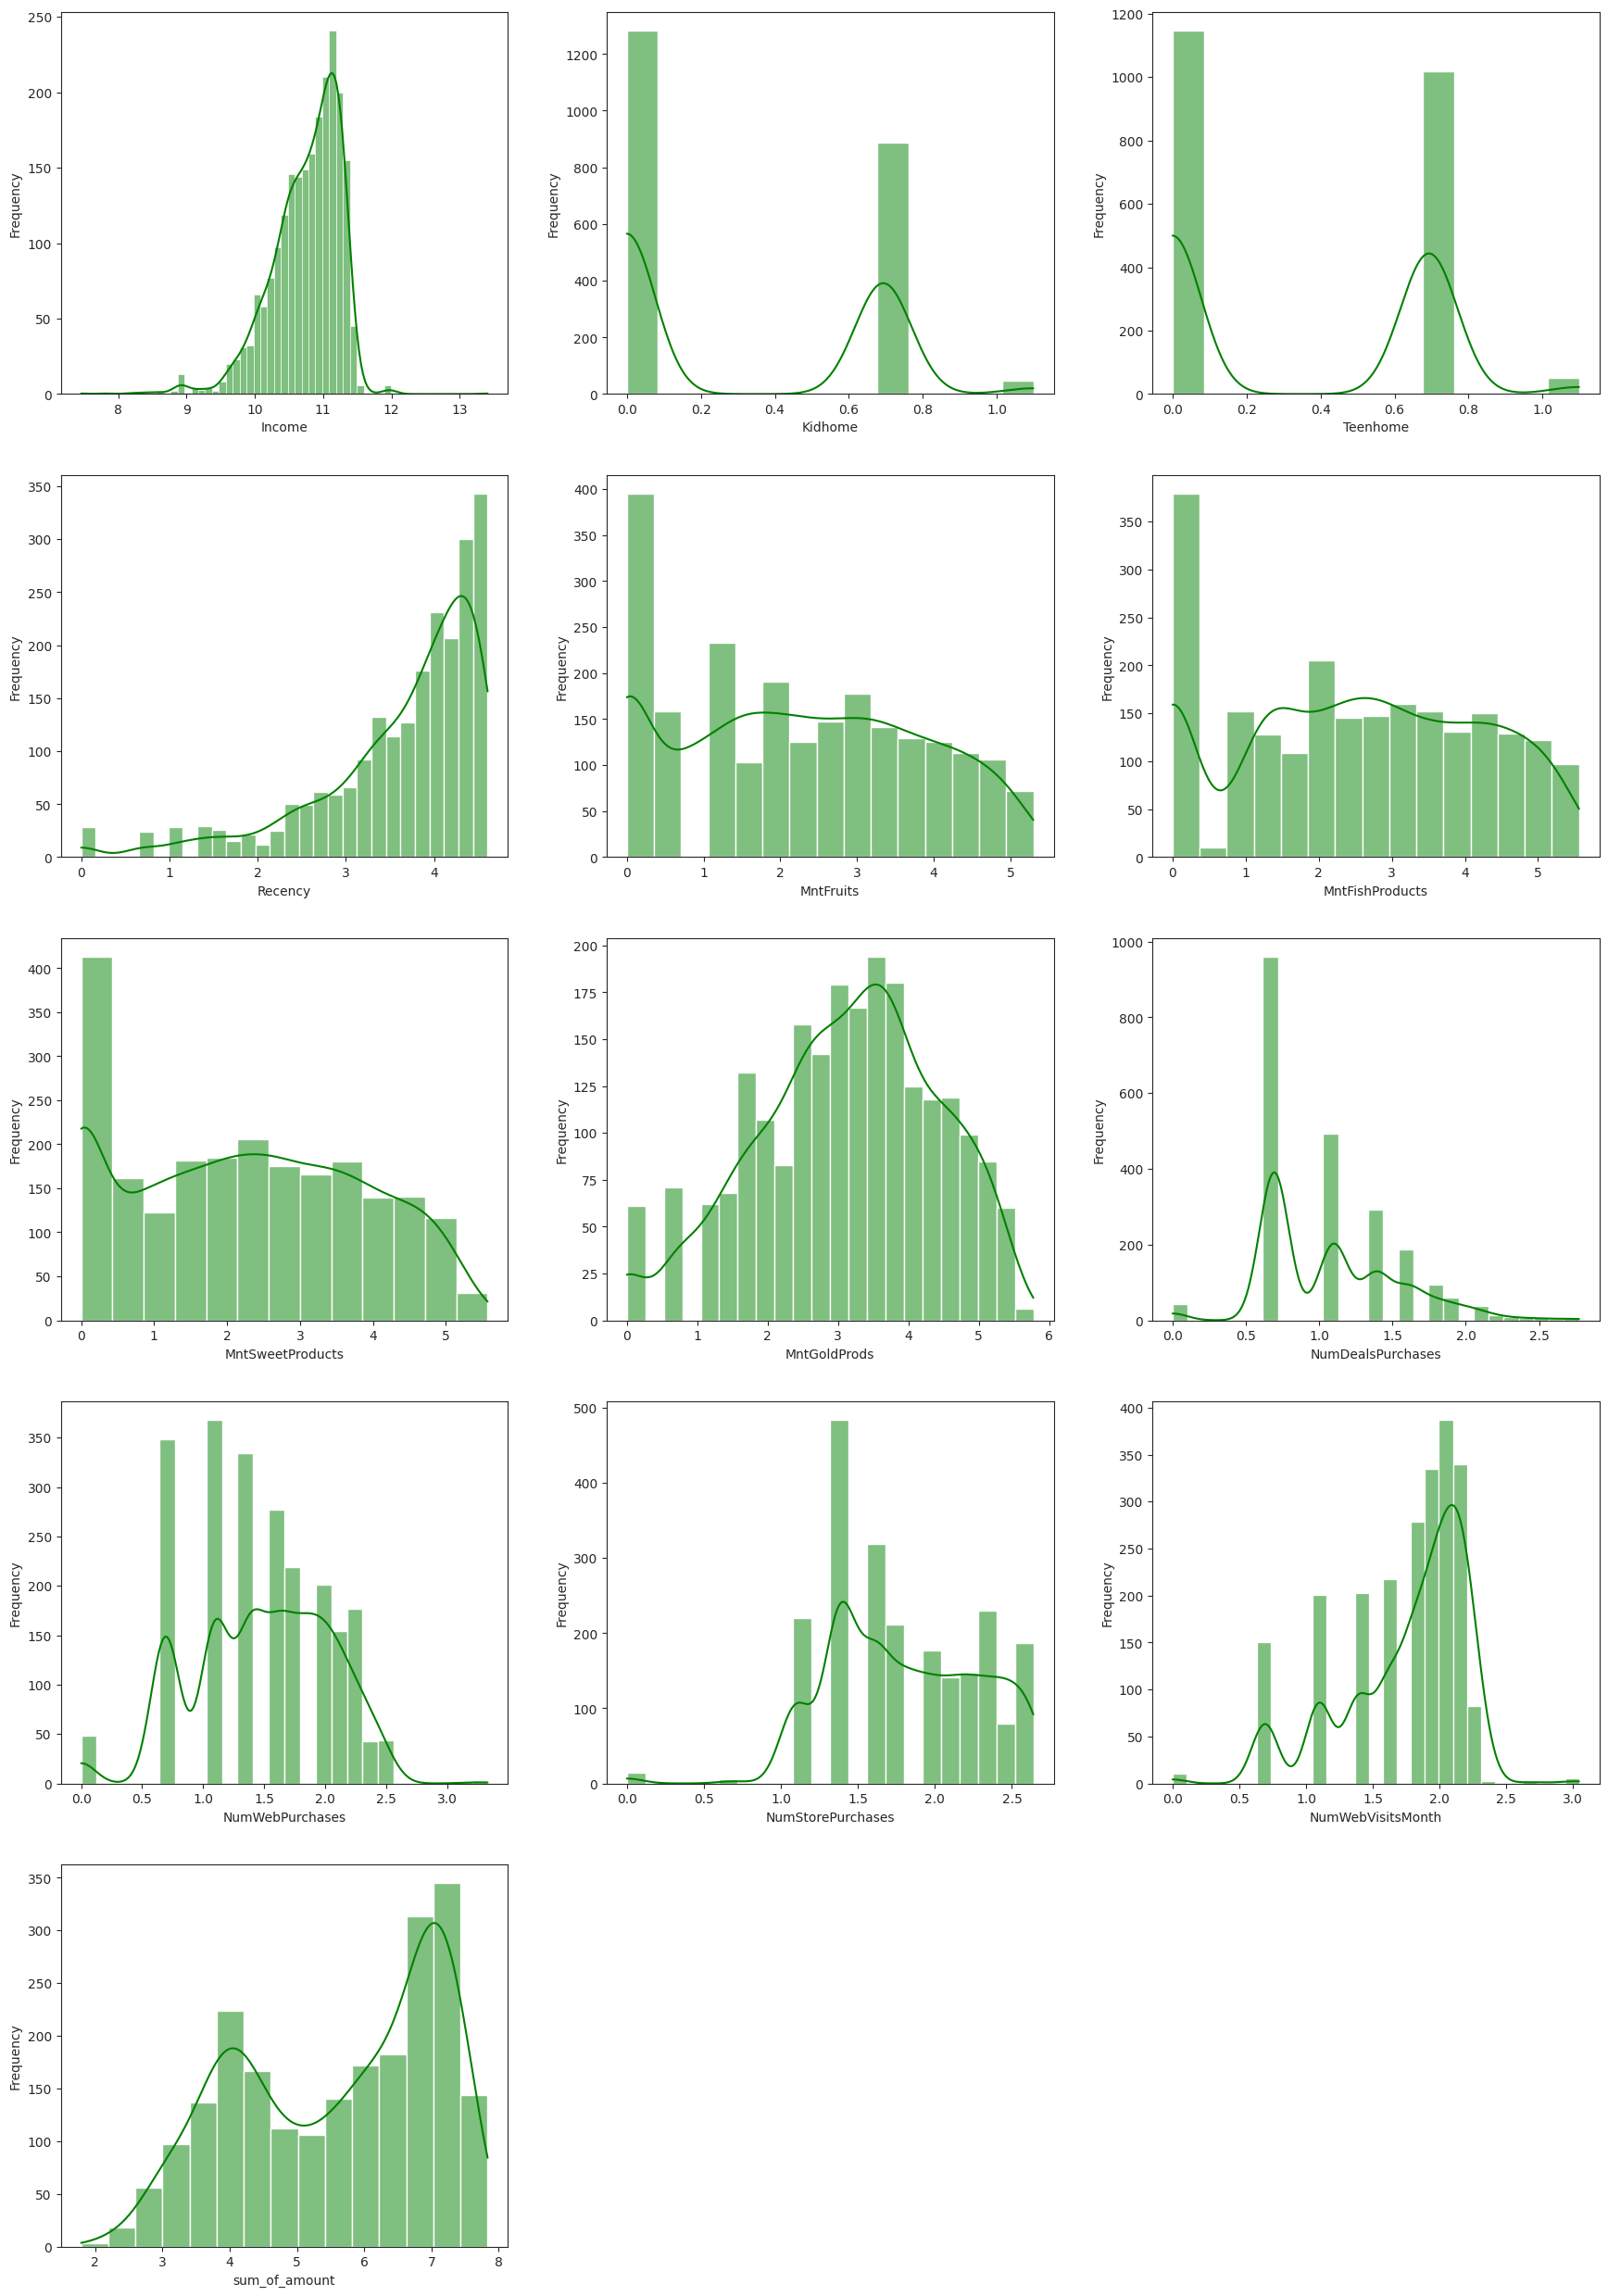

In [ ]:
# Set style
sns.set_style("ticks")

# Menyiapkan figur dengan ukuran yang lebih besar untuk memastikan kejelasan
plt.figure(figsize=(18, 30))  # Adjust the size based on your dataset and the number of subplots

# Create a subplot for each numerical feature
for i, col in enumerate(skewed):
    plt.subplot(6, 3, i+1)  # 9x3 layout is suitable for up to 27 subplots
    sns.histplot(x=df_normal[col], color='green', kde=True)  # Adding Kernel Density Estimate (KDE)
    plt.xlabel(col)
    plt.ylabel('Frequency')

# Adjust layout to make sure everything fits without overlapping
plt.tight_layout(pad=3.0)  # You can adjust padding to find what works best for your figures

# Display the plots
plt.show()

## Handling Outlier Metode z-test

In [ ]:
# Metode Z-test
from scipy import stats

# Detect outliers using Z Score
df_clean_ztest = df_normal[skewed].copy()
print(f'Jumlah baris sebelum memfilter outlier: {len(df_clean_ztest)}')

filtered_entries = np.array([True] * len(df_clean_ztest))

for col in df_clean_ztest.columns:
    zscore = abs(stats.zscore(df_clean_ztest[col]))
    filtered_entries = (zscore < 3) & filtered_entries

df2 = df_clean_ztest[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df2)}')

baris_dihapus = len(df_clean_ztest) - len(df2)
print(f'Jumlah baris yang dihapus: {baris_dihapus}')

Jumlah baris sebelum memfilter outlier: 2216
Jumlah baris setelah memfilter outlier: 2118
Jumlah baris yang dihapus: 98


Menggunakan hasil metode z-test sebagai df_clean jumlah outlier yang didetetksi adalah 101 sehingga jumlah data tersisa adalah 2115 baris.


In [ ]:
# Membuat df_clean
df_clean = df.copy()
df_clean[skewed] = df2
df_clean.dropna(inplace=True)
df_clean.shape

(2118, 27)

## E. Label Encoding

In [ ]:
# Show Cat data
df_cat.head()

,Education,Marital_Status
0,Graduation,Single
1,Graduation,Single
2,Graduation,Together
3,Graduation,Together
4,PhD,Married


In [ ]:
df_clean["Education"].value_counts()

,count
Education,
Graduation,1074
PhD,458
Master,351
2n Cycle,186
Basic,49


In [ ]:
df_clean["Marital_Status"].value_counts()

,count
Marital_Status,
Married,820
Together,553
Single,443
Divorced,222
Widow,73
Alone,3
Absurd,2
YOLO,2


## One Hot Encoding
Kolom kategorik memiliki distinct value lebih dari dua sehingga Proses Encoding lebih baik menggunakan metode One-Hot encoding.

In [ ]:
# Mengganti Alone pada marital status dengan single
df_clean["Marital_Status"].replace("Alone","Single",inplace=True)
# Hapus baris dengan Marital_Status = Absurd atau Yolo
df_clean = df_clean[~df_clean['Marital_Status'].isin(['Absurd', 'YOLO'])]

<ipython-input-38-08701f930906>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean["Marital_Status"].replace("Alone","Single",inplace=True)


In [ ]:
df_clean["Marital_Status"].value_counts()

,count
Marital_Status,
Married,820
Together,553
Single,446
Divorced,222
Widow,73


In [ ]:
# Mengasumsikan df sudah ada dan sudah di-mapped
# Menerapkan One Hot Encoding
df_education_one_hot = pd.get_dummies(df_clean['Education'], prefix='Edu')
df_marital_one_hot = pd.get_dummies(df_clean['Marital_Status'], prefix='Marital')

# Menampilkan hasil One Hot Encoding
print(df_education_one_hot.head())
print(df_marital_one_hot.head())

   Edu_2n Cycle  Edu_Basic  Edu_Graduation  Edu_Master  Edu_PhD
0         False      False            True       False    False
1         False      False            True       False    False
2         False      False            True       False    False
3         False      False            True       False    False
4         False      False           False       False     True
   Marital_Divorced  Marital_Married  Marital_Single  Marital_Together  \
0             False            False            True             False   
1             False            False            True             False   
2             False            False           False              True   
3             False            False           False              True   
4             False             True           False             False   

   Marital_Widow  
0          False  
1          False  
2          False  
3          False  
4          False  


In [ ]:
# Gabungkan One Hot Encoding kembali ke DataFrame asli
df_clean = df_clean.join(df_education_one_hot)
df_clean = df_clean.join(df_marital_one_hot)

# Menampilkan beberapa baris dari DataFrame yang sudah diperbarui
df_clean.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntFruits,...,Edu_2n Cycle,Edu_Basic,Edu_Graduation,Edu_Master,Edu_PhD,Marital_Divorced,Marital_Married,Marital_Single,Marital_Together,Marital_Widow
0,5524,1957,Graduation,Single,10.970592,0.000000,0.000000,2012-09-04,4.077537,4.488636,...,False,False,True,False,False,False,False,True,False,False
1,2174,1954,Graduation,Single,10.743869,0.693147,0.693147,2014-03-08,3.663562,0.693147,...,False,False,True,False,False,False,False,True,False,False
2,4141,1965,Graduation,Together,11.179046,0.000000,0.000000,2013-08-21,3.295837,3.912023,...,False,False,True,False,False,False,False,False,True,False
3,6182,1984,Graduation,Together,10.190432,0.693147,0.000000,2014-02-10,3.295837,1.609438,...,False,False,True,False,False,False,False,False,True,False
4,5324,1981,PhD,Married,10.973254,0.693147,0.000000,2014-01-19,4.553877,3.784190,...,False,False,False,False,True,False,True,False,False,False


DF Clean Telah Berhasil diencoding

## Data Splitting


In [ ]:
# Membuat list fitur prediktor
x = list(df.columns)
x.remove('Response')
x.remove('ID')

In [ ]:
X = df_clean[x]
y = df_clean['Response']

In [ ]:
from sklearn.model_selection import train_test_split

# Membagi data menjadi training set dan testing set
X_train, X_test, y_train, y_test = train_test_split(
    df_clean[x],  # Fitur
    df_clean['Response'],  # Target
    test_size=0.3,  # Proporsi data test adalah 30%
    random_state=42  # Mengatur seed untuk hasil yang konsisten
)

# Tampilkan ukuran setiap set
print("Ukuran X_train:", X_train.shape)
print("Ukuran X_test:", X_test.shape)
print("Ukuran y_train:", y_train.shape)
print("Ukuran y_test:", y_test.shape)

Ukuran X_train: (1479, 25)
Ukuran X_test: (635, 25)
Ukuran y_train: (1479,)
Ukuran y_test: (635,)


## Data Scalling

In [ ]:
# Remove ID dan Response dari list nums
nums.remove('ID')
nums.remove('Response')

In [ ]:
from sklearn.preprocessing import StandardScaler
# Standardisasi X_train
scaler = StandardScaler()
X_train_scaled_nums = scaler.fit_transform(X_train[nums])
X_test_scaled_nums = scaler.transform(X_test[nums])

# Memasukkan hasil standardisasi fitur numerik kedalam X_train dan X_test
X_train[nums] = X_train_scaled_nums
X_test[nums] = X_test_scaled_nums

scalling dengan standardisasi (standardscaller) pada data X_train dan X_test fitur numerik. lalu memasukkan hasil standardisasi kembali kedalam X_train dan X_test.

## F. Class Imbalance

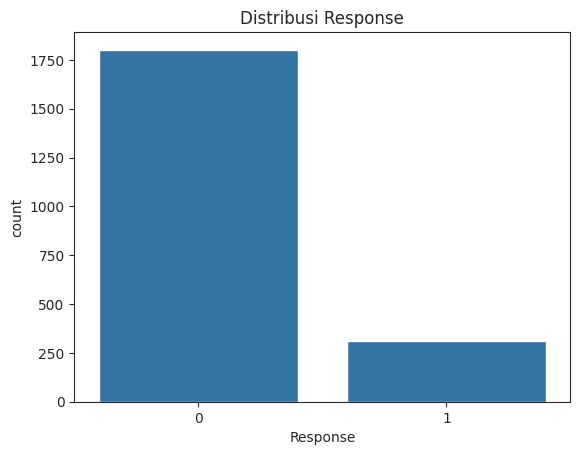

In [ ]:
sns.countplot(x='Response', data=df_clean)
plt.title("Distribusi Response")

plt.show()

In [ ]:
# Menghitung jumlah masing-masing value response
df_response = df_clean.pivot_table(index='Response', values='ID', aggfunc='count').reset_index()
df_response['Percentage'] = (df_response['ID'] / df_response['ID'].sum()) * 100
df_response

,Response,ID,Percentage
0,0,1802,85.241249
1,1,312,14.758751


### Intepretasi:
Terdapat class imbalance pada kolom target yang signifikan. Untuk menangani hal ini kami memilih menggunakan metode Kombinasi oversampling dan Undersampling. Data Minority akan di upsample terlebih dahulu hingga sekitar sebesar 70% data majority lalu data majority akan di undersampling hingga jumlah data sama.

### Oversampling dengan SMOTE

In [ ]:
# Import Packages
from imblearn.over_sampling import SMOTE
from collections import Counter

# SMOTE dengan oversampling minoritas hingga 60% dari mayoritas
smote = SMOTE(sampling_strategy=0.7)

# Melakukan oversampling dengan SMOTE
X_over, y_over = smote.fit_resample(X_train[nums], y_train)

# Melihat distribusi kelas setelah SMOTE
print(f"Distribusi kelas sebelum SMOTE: {Counter(y_train)}")
print(f"Distribusi kelas setelah SMOTE: {Counter(y_over)}")

Distribusi kelas sebelum SMOTE: Counter({0: 1246, 1: 233})
Distribusi kelas setelah SMOTE: Counter({0: 1246, 1: 872})


In [ ]:
# Menghitung jumlah masing-masing value response
df_response_ovr = y_over.value_counts().reset_index()
df_response_ovr.columns = ['Response', 'Count']
df_response_ovr['Percentage'] = (df_response_ovr['Count'] / df_response_ovr['Count'].sum()) * 100
df_response_ovr

,Response,Count,Percentage
0,0,1246,58.829084
1,1,872,41.170916


Presentase Response 1 dan 0 sudah sebesar kurang lebih 60-40%

### UnderSampling dengan RandomUnderSampler

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Melakukan undersampling agar kelas mayoritas dan minoritas seimbang
under_sampler = RandomUnderSampler(sampling_strategy=1.0)  # 1.0 berarti mayoritas dan minoritas seimbang

# Melakukan undersampling
X_res, y_res = under_sampler.fit_resample(X_over, y_over)

# Melihat distribusi kelas setelah undersampling
print(f"Distribusi kelas setelah undersampling: {Counter(y_res)}")

Distribusi kelas setelah undersampling: Counter({0: 872, 1: 872})


Jumlah data sudah sama setalah melakukan kombinasi oversampling SMOTE dan random under sampling. Jumlah data seimbang pada 872 data.

In [ ]:
# Menggunakan data yang sudah balance sebagai X_train dan Y_train
X_train = X_res
y_train = y_res

In [ ]:
nums

['Year_Birth',
 'Income',
 'Kidhome',
 'Teenhome',
 'Recency',
 'MntFruits',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'have_child',
 'sum_of_amount',
 'Acc_Cmp']

# Stage 3 (Modelling)


## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Inisialisasi model Logistic Regression
model_logreg = LogisticRegression(max_iter=1000)

# Melatih model dengan data training
model_logreg.fit(X_train, y_train)

# Melakukan prediksi dengan data testing
y_pred_logreg = model_logreg.predict(X_test[nums])

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred_logreg)
precision = precision_score(y_test, y_pred_logreg)
recall = recall_score(y_test, y_pred_logreg)
f1 = f1_score(y_test, y_pred_logreg)
roc_auc = roc_auc_score(y_test, y_pred_logreg)
confusion = confusion_matrix(y_test, y_pred_logreg)

print(f"Accuracy (Logistic Regression): {accuracy}")
print(f"Precision (Logistic Regression): {precision}")
print(f"Recall (Logistic Regression): {recall}")
print(f"F1-Score (Logistic Regression): {f1}")
print(f"ROC AUC (Logistic Regression): {roc_auc}")
print(f"Confusion Matrix (Logistic Regression):\n{confusion}")


# Prediksi pada data training
y_pred_train = model_logreg.predict(X_train)

# Hitung akurasi pada data training dan testing
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_logreg)

print(f"\nAkurasi Training (Logistic Regression): {train_accuracy}")
print(f"Akurasi Testing (Logistic Regression): {test_accuracy}")

# Evaluasi overfitting/underfitting
if train_accuracy > test_accuracy and train_accuracy > 0.85:
  print("\nModel Logistic Regression cenderung overfitting.")
elif train_accuracy < test_accuracy and train_accuracy < 0.7:
  print("\nModel Logistic Regression cenderung underfitting.")
else:
  print("\nModel Logistic Regression cenderung best-fit.")


Accuracy (Logistic Regression): 0.8094488188976378
Precision (Logistic Regression): 0.36538461538461536
Recall (Logistic Regression): 0.7215189873417721
F1-Score (Logistic Regression): 0.4851063829787234
ROC AUC (Logistic Regression): 0.7717307166924687
Confusion Matrix (Logistic Regression):
[[457  99]
 [ 22  57]]

Akurasi Training (Logistic Regression): 0.8153669724770642
Akurasi Testing (Logistic Regression): 0.8094488188976378

Model Logistic Regression cenderung best-fit.


## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Inisialisasi model Decision Tree
model_dt = DecisionTreeClassifier(random_state=42)

# Melatih model dengan data training
model_dt.fit(X_train, y_train)

# Melakukan prediksi dengan data testing
y_pred_dt = model_dt.predict(X_test[nums])

# Evaluasi model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
roc_auc_dt = roc_auc_score(y_test, y_pred_dt)
confusion_dt = confusion_matrix(y_test, y_pred_dt)

print(f"Accuracy (Decision Tree): {accuracy_dt}")
print(f"Precision (Decision Tree): {precision_dt}")
print(f"Recall (Decision Tree): {recall_dt}")
print(f"F1-Score (Decision Tree): {f1_dt}")
print(f"ROC AUC (Decision Tree): {roc_auc_dt}")
print(f"Confusion Matrix (Decision Tree):\n{confusion_dt}")


# Prediksi pada data training
y_pred_train_dt = model_dt.predict(X_train)

# Hitung akurasi pada data training dan testing
train_accuracy_dt = accuracy_score(y_train, y_pred_train_dt)
test_accuracy_dt = accuracy_score(y_test, y_pred_dt)

print(f"\nAkurasi Training (Decision Tree): {train_accuracy_dt}")
print(f"Akurasi Testing (Decision Tree): {test_accuracy_dt}")

# Evaluasi overfitting/underfitting
if train_accuracy_dt > test_accuracy_dt and train_accuracy_dt > 0.85:
  print("\nModel Decision Tree cenderung overfitting.")
elif train_accuracy_dt < test_accuracy_dt and train_accuracy_dt < 0.7:
  print("\nModel Decision Tree cenderung underfitting.")
else:
  print("\nModel Decision Tree cenderung best-fit.")


Accuracy (Decision Tree): 0.8078740157480315
Precision (Decision Tree): 0.3383458646616541
Recall (Decision Tree): 0.569620253164557
F1-Score (Decision Tree): 0.42452830188679247
ROC AUC (Decision Tree): 0.7056734359347965
Confusion Matrix (Decision Tree):
[[468  88]
 [ 34  45]]

Akurasi Training (Decision Tree): 0.9977064220183486
Akurasi Testing (Decision Tree): 0.8078740157480315

Model Decision Tree cenderung overfitting.


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Inisialisasi model Random Forest
model_rf = RandomForestClassifier(random_state=42)

# Melatih model dengan data training
model_rf.fit(X_train, y_train)

# Melakukan prediksi dengan data testing
y_pred_rf = model_rf.predict(X_test[nums])

# Evaluasi model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)
confusion_rf = confusion_matrix(y_test, y_pred_rf)

print(f"Accuracy (Random Forest): {accuracy_rf}")
print(f"Precision (Random Forest): {precision_rf}")
print(f"Recall (Random Forest): {recall_rf}")
print(f"F1-Score (Random Forest): {f1_rf}")
print(f"ROC AUC (Random Forest): {roc_auc_rf}")
print(f"Confusion Matrix (Random Forest):\n{confusion_rf}")


# Prediksi pada data training
y_pred_train_rf = model_rf.predict(X_train)

# Hitung akurasi pada data training dan testing
train_accuracy_rf = accuracy_score(y_train, y_pred_train_rf)
test_accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(f"\nAkurasi Training (Random Forest): {train_accuracy_rf}")
print(f"Akurasi Testing (Random Forest): {test_accuracy_rf}")

# Evaluasi overfitting/underfitting
if train_accuracy_rf > test_accuracy_rf and train_accuracy_rf > 0.85:
  print("\nModel Random Forest cenderung overfitting.")
elif train_accuracy_rf < test_accuracy_rf and train_accuracy_rf < 0.7:
  print("\nModel Random Forest cenderung underfitting.")
else:
  print("\nModel Random Forest cenderung best-fit.")


Accuracy (Random Forest): 0.8472440944881889
Precision (Random Forest): 0.4117647058823529
Recall (Random Forest): 0.5316455696202531
F1-Score (Random Forest): 0.46408839779005523
ROC AUC (Random Forest): 0.7118659502777525
Confusion Matrix (Random Forest):
[[496  60]
 [ 37  42]]

Akurasi Training (Random Forest): 0.9977064220183486
Akurasi Testing (Random Forest): 0.8472440944881889

Model Random Forest cenderung overfitting.


## KNN



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Inisialisasi model K-Nearest Neighbors
model_knn = KNeighborsClassifier()

# Melatih model dengan data training
model_knn.fit(X_train, y_train)

# Melakukan prediksi dengan data testing
y_pred_knn = model_knn.predict(X_test[nums])

# Evaluasi model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
roc_auc_knn = roc_auc_score(y_test, y_pred_knn)
confusion_knn = confusion_matrix(y_test, y_pred_knn)

print(f"Accuracy (K-Nearest Neighbors): {accuracy_knn}")
print(f"Precision (K-Nearest Neighbors): {precision_knn}")
print(f"Recall (K-Nearest Neighbors): {recall_knn}")
print(f"F1-Score (K-Nearest Neighbors): {f1_knn}")
print(f"ROC AUC (K-Nearest Neighbors): {roc_auc_knn}")
print(f"Confusion Matrix (K-Nearest Neighbors):\n{confusion_knn}")


# Prediksi pada data training
y_pred_train_knn = model_knn.predict(X_train)

# Hitung akurasi pada data training dan testing
train_accuracy_knn = accuracy_score(y_train, y_pred_train_knn)
test_accuracy_knn = accuracy_score(y_test, y_pred_knn)

print(f"\nAkurasi Training (K-Nearest Neighbors): {train_accuracy_knn}")
print(f"Akurasi Testing (K-Nearest Neighbors): {test_accuracy_knn}")

# Evaluasi overfitting/underfitting
if train_accuracy_knn > test_accuracy_knn and train_accuracy_knn > 0.85:
  print("\nModel K-Nearest Neighbors cenderung overfitting.")
elif train_accuracy_knn < test_accuracy_knn and train_accuracy_knn < 0.7:
  print("\nModel K-Nearest Neighbors cenderung underfitting.")
else:
  print("\nModel K-Nearest Neighbors cenderung best-fit.")


Accuracy (K-Nearest Neighbors): 0.752755905511811
Precision (K-Nearest Neighbors): 0.2925531914893617
Recall (K-Nearest Neighbors): 0.6962025316455697
F1-Score (K-Nearest Neighbors): 0.41198501872659177
ROC AUC (K-Nearest Neighbors): 0.7284969492760223
Confusion Matrix (K-Nearest Neighbors):
[[423 133]
 [ 24  55]]

Akurasi Training (K-Nearest Neighbors): 0.9071100917431193
Akurasi Testing (K-Nearest Neighbors): 0.752755905511811

Model K-Nearest Neighbors cenderung overfitting.


## Parameter Tunning



2 Model terbaik terbaik yang akan dilakukan Parameter tuning adalah Logistic Regresion dan Random Forest

### Logistic Regresion

In [ ]:
from sklearn.model_selection import GridSearchCV

# Inisialisasi model Logistic Regression
model_logreg = LogisticRegression(max_iter=1000)

# Definisikan parameter grid yang ingin diuji
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],               # Regularization strength (C)
    'penalty': ['l1', 'l2'],                    # Penalty type (L1 or L2 regularization)
    'solver': ['liblinear', 'saga'],            # Solver digunakan tergantung pada penalty
}

# Inisialisasi GridSearchCV dengan 5-fold cross-validation
grid_search = GridSearchCV(model_logreg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit model dengan data training
grid_search.fit(X_train, y_train)

# Menampilkan hasil terbaik dari grid search
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best accuracy: {grid_search.best_score_}")

# Menggunakan model dengan parameter terbaik untuk prediksi pada data test
best_model = grid_search.best_estimator_
y_pred_logreg = best_model.predict(X_test[nums])

# Evaluasi model terbaik
accuracy = accuracy_score(y_test, y_pred_logreg)
precision = precision_score(y_test, y_pred_logreg)
recall = recall_score(y_test, y_pred_logreg)
f1 = f1_score(y_test, y_pred_logreg)
roc_auc = roc_auc_score(y_test, y_pred_logreg)
confusion = confusion_matrix(y_test, y_pred_logreg)

print(f"\nAccuracy (Tuned Logistic Regression): {accuracy}")
print(f"Precision (Tuned Logistic Regression): {precision}")
print(f"Recall (Tuned Logistic Regression): {recall}")
print(f"F1-Score (Tuned Logistic Regression): {f1}")
print(f"ROC AUC (Tuned Logistic Regression): {roc_auc}")
print(f"Confusion Matrix (Tuned Logistic Regression):\n{confusion}")

# Evaluasi akurasi pada data training dan testing setelah tuning
y_pred_train = best_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_logreg)

print(f"\nAkurasi Training (Tuned Logistic Regression): {train_accuracy}")
print(f"Akurasi Testing (Tuned Logistic Regression): {test_accuracy}")


Best parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Best accuracy: 0.816505286038929

Accuracy (Tuned Logistic Regression): 0.8094488188976378
Precision (Tuned Logistic Regression): 0.36538461538461536
Recall (Tuned Logistic Regression): 0.7215189873417721
F1-Score (Tuned Logistic Regression): 0.4851063829787234
ROC AUC (Tuned Logistic Regression): 0.7717307166924687
Confusion Matrix (Tuned Logistic Regression):
[[457  99]
 [ 22  57]]

Akurasi Training (Tuned Logistic Regression): 0.8193807339449541
Akurasi Testing (Tuned Logistic Regression): 0.8094488188976378


#### Intepretasi
Hasil Akurasi Training dan Akurasi Testing setelah hyperparameter tuning tidak berbeda signifikan karena hasil model logistic regresion sudah terindikasi best-fit sebelum dilakukan hyperparameter tuning.

#### Cross Validation

In [ ]:
# prompt: setelah melakukan hyperparameter tuning, lanjutkan dengan cross validation untuk model logistic regression

from sklearn.model_selection import cross_val_score

# Gunakan model dengan parameter terbaik dari GridSearchCV
best_model = grid_search.best_estimator_

# Lakukan cross-validation dengan 5 fold
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy')

# Print hasil cross-validation
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())
print("Standard deviation of cross-validation scores:", cv_scores.std())


Cross-validation scores: [0.8252149  0.82234957 0.80229226 0.83094556 0.80172414]
Mean cross-validation score: 0.816505286038929
Standard deviation of cross-validation scores: 0.012157523179704983


###### Intepretasi
Setelah dilakukan cross validation dengan 5 fold didapat hasil Mean cross-validation score: 0.7952969074202153. Hasil ini tidak berbeda jauh dengan akurasi data train dan data test maka model sudah dapat dikatakan stabil.

### Random Forest

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Inisialisasi model Random Forest
model_rf = RandomForestClassifier(random_state=42)

# Definisikan parameter grid untuk dicari
param_dist = {
    'n_estimators': [100, 200, 300],          # Jumlah pohon dalam forest
    'max_depth': [None, 10, 20, 30],          # Kedalaman maksimum pohon
    'min_samples_split': [2, 5, 10],          # Minimum sampel untuk split
    'min_samples_leaf': [1, 2, 4],            # Minimum sampel pada setiap daun
    'max_features': ['sqrt', 'log2'],         # Jumlah fitur untuk dipertimbangkan saat split
    'bootstrap': [True, False]                # Apakah bootstrap digunakan
}

# Inisialisasi RandomizedSearchCV
random_search_rf = RandomizedSearchCV(estimator=model_rf, param_distributions=param_dist,
                                      n_iter=10, cv=5, verbose=2, random_state=42, n_jobs=-1)

# Melakukan pencarian parameter terbaik pada data training
random_search_rf.fit(X_train, y_train)

# Menampilkan parameter terbaik
print(f"Best parameters: {random_search_rf.best_params_}")
print(f"Best accuracy: {random_search_rf.best_score_}")

# Menggunakan model dengan parameter terbaik untuk prediksi pada data test
best_rf_model = random_search_rf.best_estimator_
y_pred_rf_tuned = best_rf_model.predict(X_test[nums])

# Evaluasi model terbaik
accuracy_rf = accuracy_score(y_test, y_pred_rf_tuned)
precision_rf = precision_score(y_test, y_pred_rf_tuned)
recall_rf = recall_score(y_test, y_pred_rf_tuned)
f1_rf = f1_score(y_test, y_pred_rf_tuned)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf_tuned)
confusion_rf = confusion_matrix(y_test, y_pred_rf_tuned)

print(f"\nAccuracy (Tuned Random Forest): {accuracy_rf}")
print(f"Precision (Tuned Random Forest): {precision_rf}")
print(f"Recall (Tuned Random Forest): {recall_rf}")
print(f"F1-Score (Tuned Random Forest): {f1_rf}")
print(f"ROC AUC (Tuned Random Forest): {roc_auc_rf}")
print(f"Confusion Matrix (Tuned Random Forest):\n{confusion_rf}")

# Evaluasi akurasi pada data training dan testing setelah tuning
y_pred_train = best_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_rf_tuned)

print(f"\nAkurasi Training (Tuned Logistic Regression): {train_accuracy}")
print(f"Akurasi Testing (Tuned Logistic Regression): {test_accuracy}")


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 30, 'bootstrap': False}
Best accuracy: 0.9134341138886144

Accuracy (Tuned Random Forest): 0.8566929133858268
Precision (Tuned Random Forest): 0.4387755102040816
Recall (Tuned Random Forest): 0.5443037974683544
F1-Score (Tuned Random Forest): 0.4858757062146893
ROC AUC (Tuned Random Forest): 0.7226914670795009
Confusion Matrix (Tuned Random Forest):
[[501  55]
 [ 36  43]]

Akurasi Training (Tuned Logistic Regression): 0.8193807339449541
Akurasi Testing (Tuned Logistic Regression): 0.8566929133858268


In [ ]:
from sklearn.metrics import accuracy_score

# Menggunakan model dengan parameter terbaik untuk prediksi pada data test dan data train
y_pred_rf_tuned_train = best_rf_model.predict(X_train)
y_pred_rf_tuned_test = best_rf_model.predict(X_test[nums])

# Evaluasi model pada data training
train_accuracy_rf_tuned = accuracy_score(y_train, y_pred_rf_tuned_train)
test_accuracy_rf_tuned = accuracy_score(y_test, y_pred_rf_tuned_test)

# Menampilkan hasil akurasi setelah tuning
print(f"\nAkurasi Training setelah Tuning (Random Forest): {train_accuracy_rf_tuned}")
print(f"Akurasi Testing setelah Tuning (Random Forest): {test_accuracy_rf_tuned}")



Akurasi Training setelah Tuning (Random Forest): 0.9977064220183486
Akurasi Testing setelah Tuning (Random Forest): 0.8566929133858268


#### Intepretasi
Setelah dilakukan hyperparameter tuning model random forest masih terindikasi overfit, terlihat dari gap Akurasi data train dan data test yang lebih dari 10%.

#### Cross Validation

In [ ]:
# prompt: lakukan cross validation pada mode random forest setelah dilakukan hyper parameter tuning

# Gunakan model dengan parameter terbaik dari RandomizedSearchCV
best_rf_model = random_search_rf.best_estimator_

# Lakukan cross-validation dengan 5 fold
cv_scores_rf = cross_val_score(best_rf_model, X_train, y_train, cv=5, scoring='accuracy')

# Print hasil cross-validation
print("Cross-validation scores (Random Forest):", cv_scores_rf)
print("Mean cross-validation score (Random Forest):", cv_scores_rf.mean())
print("Standard deviation of cross-validation scores (Random Forest):", cv_scores_rf.std())


Cross-validation scores (Random Forest): [0.85959885 0.90544413 0.92550143 0.93409742 0.94252874]
Mean cross-validation score (Random Forest): 0.9134341138886144
Standard deviation of cross-validation scores (Random Forest): 0.029601231706701616


##### Intepretasi
Setelah dilakukan cross validation dengan 5 fold didapatkan Mean cross-validation score (Random Forest): 0.9203174916839574. Hasil Cukup berbeda dari akurasi data train dan data test karena model sebelumnya masih terindikasi overfit.

## Model Terpilih
Model yang sebaiknya dipilih yaitu adalah logistic regresion karena memiliki akurasi yang tidak overfit, memiliki cross validation yang stabil, dan memiliki nilai recall yang lebih besar dari model random forest.

## Feature Importance

### Logistic Regression

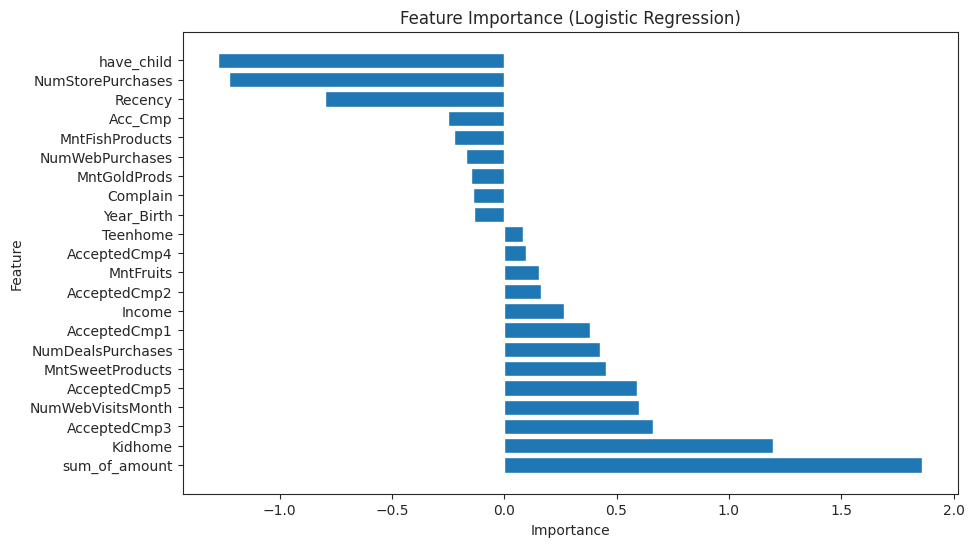

In [ ]:
# Mendapatkan feature importance dari model Logistic Regression yang sudah dituning
feature_importance = best_model.coef_[0]

# Membuat DataFrame untuk menampilkan feature importance
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Membuat plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance (Logistic Regression)')
plt.show()


### Intepretasi
Positif dan Negatif Feature Importance:
- Fitur dengan nilai positif (sebelah kanan, positif dari 0) menunjukkan bahwa kenaikan nilai fitur tersebut akan meningkatkan probabilitas hasil prediksi menjadi kelas positif (response = 1). Misalnya, fitur sum_of_amount dan Kidhome memiliki kontribusi positif yang paling besar.
- Fitur dengan nilai negatif (sebelah kiri, negatif dari 0) menunjukkan bahwa kenaikan nilai fitur tersebut akan menurunkan probabilitas hasil prediksi menjadi kelas positif (response = 0). Misalnya, NumStorePurchases, Recency, dan have_child memiliki kontribusi negatif terbesar.

#### Insight
Beberapa Fitur yang memiliki pengaruh terbesar dalam keputusan customer terhadap respon adalah: sum_of_amount, Kidhome, AcceptedCmp3, NumStorePurchases, Recency, dan have_child.
- Pelanggan dengan jumlah pembelian yang tinggi akan meningkatkan kemungkinan response positif.
- Customer dengan jumlah anak kecil lebih banyak akan meningkatkan kemungkinan response positif.
- Customer yang menerima campaign ketiga memiliki kemungkinan menerima response lebih tinggi.
- Customer dengan NumStorePurchases yang tinggi akan menurunkan kemungkinan response positif.
- Customer dengan recency yang besar akan menurunkan kemungkinan response positif.
- Customer dengan jumlah anak (remaja maupun kecil) menurunkan kemungkinan response positif.

#### Rekomendasi Model
Buat model dengan fitur yang diseleksi berdasarkan Insight yang didapat. Mungkin saja terdapat kenaikan performa ataupun mengurangi kemungkinan terjadinya overfitting.

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_logreg)
TN, FP, FN, TP = cm.ravel()
print(f"True Positive: {TP}")
print(f"False Negative: {FN}")
print(f"False Positive: {FP}")
print(f"True Negative: {TN}")

True Positive: 57
False Negative: 22
False Positive: 99
True Negative: 457
